# Yoder Dataset

In [27]:
# Cell 1: Import libraries and load data
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('default')
sns.set_palette("husl")

# Load the datasets
def load_jsonl(filepath):
    """Load JSONL file into a list of dictionaries"""
    data = []
    with open(filepath, 'r', encoding='utf-8') as f:
        for line in f:
            data.append(json.loads(line.strip()))
    return data

# Load both datasets
demographic_data = load_jsonl('../../data/raw/yoder_data/sampled/demographic_category_hate_corpora.jsonl')
identity_data = load_jsonl('../../data/raw/yoder_data/sampled/identity_hate_corpora.jsonl')
power_data = load_jsonl('../../data/raw/yoder_data/sampled/power_hate_corpora.jsonl')

print(f"Loaded {len(demographic_data)} records from Demographic_category_hate.jsonl")
print(f"Loaded {len(identity_data)} records from Identity_hate_corpora.jsonl")
print(f"Loaded {len(power_data)} records from Power_hate_corpora.jsonl")
print("Data loading complete!")

Loaded 276872 records from Demographic_category_hate.jsonl
Loaded 159872 records from Identity_hate_corpora.jsonl
Loaded 295016 records from Power_hate_corpora.jsonl
Data loading complete!


In [28]:
# Cell 2: Basic data structure analysis
print("=== DATASET STRUCTURE ANALYSIS ===\n")

# Convert to DataFrames for easier analysis
df_demo = pd.DataFrame(demographic_data)
df_identity = pd.DataFrame(identity_data)
df_power = pd.DataFrame(power_data)

print("DEMOGRAPHIC DATASET:")
print(f"Shape: {df_demo.shape}")
print(f"Columns: {list(df_demo.columns)}")
print(f"Data types:\n{df_demo.dtypes}\n")

print("IDENTITY DATASET:")
print(f"Shape: {df_identity.shape}")
print(f"Columns: {list(df_identity.columns)}")
print(f"Data types:\n{df_identity.dtypes}\n")

print("POWER DATASET:")
print(f"Shape: {df_power.shape}")
print(f"Columns: {list(df_power.columns)}")
print(f"Data types:\n{df_power.dtypes}\n")

# Check for missing values
print("MISSING VALUES:")
print("Demographic dataset:")
print(df_demo.isnull().sum())
print("\nIdentity dataset:")
print(df_identity.isnull().sum())
print("\nPower dataset:")
print(df_power.isnull().sum())

=== DATASET STRUCTURE ANALYSIS ===

DEMOGRAPHIC DATASET:
Shape: (276872, 6)
Columns: ['grouping', 'fold', 'text', 'target_groups', 'dataset', 'hate']
Data types:
grouping         object
fold             object
text             object
target_groups    object
dataset          object
hate               bool
dtype: object

IDENTITY DATASET:
Shape: (159872, 6)
Columns: ['grouping', 'fold', 'text', 'target_groups', 'dataset', 'hate']
Data types:
grouping         object
fold             object
text             object
target_groups    object
dataset          object
hate               bool
dtype: object

POWER DATASET:
Shape: (295016, 6)
Columns: ['grouping', 'fold', 'text', 'target_groups', 'dataset', 'hate']
Data types:
grouping         object
fold             object
text             object
target_groups    object
dataset          object
hate               bool
dtype: object

MISSING VALUES:
Demographic dataset:
grouping         0
fold             0
text             0
target_groups    0
datas

In [29]:
print(f'Number of test records in demographic dataset: {len(df_demo[df_demo["fold"] == "test"])}, ')
print(f'Number of test records in identity dataset: {len(df_identity[df_identity["fold"] == "test"])}\n')
print(f'Number of test records in power dataset: {len(df_power[df_power["fold"] == "test"])}\n')

Number of test records in demographic dataset: 110736, 
Number of test records in identity dataset: 63952

Number of test records in power dataset: 118160



In [30]:
df_demo.head(10)

,grouping,fold,text,target_groups,dataset,hate
0,race/ethnicity,train,"RIP, Captain. My condolences to his wife, fam...",[],civilcomments,False
1,race/ethnicity,train,There's nothing wrong with sex between two con...,[],sbic,False
2,race/ethnicity,train,Ultimately a cis gay man (like me for the reco...,"[men, transgender men, transgender women, wome...",kennedy2020,False
3,race/ethnicity,train,There most certainly are some words that I dou...,[],civilcomments,False
4,race/ethnicity,train,<user> <user> <user> <user> <user> <user> a vo...,[],hatexplain,False
5,race/ethnicity,train,Last summer I found out that all of my family ...,[],sbic,False
6,race/ethnicity,train,iq nationalism leads to a jew asian bugocracy ...,"[white people, asian people, jews]",hatexplain,True
7,race/ethnicity,train,May Allah accept it from us as an act of Ibada...,"[arabic/middle eastern people, buddhists, hind...",kennedy2020,False
8,race/ethnicity,train,I am deeply troubled by the recent actions of ...,"[muslims, asian people, latinx people]",civilcomments,True
9,race/ethnicity,train,Speak of the devil... ;-),[],civilcomments,False


In [31]:
df_identity.head(10)

,grouping,fold,text,target_groups,dataset,hate
0,christians,train,attention all you right wing straight christia...,"[christians, muslims, men]",hatexplain,True
1,christians,train,YOUR BOYFRIEND WAS A FAGGOT THAT LIKE TO FUCK ...,"[black people, christians, men, women, gay peo...",kennedy2020,True
2,christians,train,Under-populated Oregon out here on the left co...,[],civilcomments,False
3,christians,train,Yes! I am finally done w/ this whole biology b...,[],sbic,False
4,christians,train,@EFeider @LukeyFAX @MiaFarrow @ThomasJTobin1 E...,"[men, non-binary people, transgender men, tran...",kennedy2020,False
5,christians,train,motley: I don't know what TANSTAAFL stands for...,[],civilcomments,False
6,christians,train,"Whatever you like for yourself, like for other...","[asian people, black people, latinx people, ar...",kennedy2020,False
7,christians,train,Religion is still a thing? Hmm.. go figure. Si...,"[buddhists, christians, hindus, jews, mormons,...",kennedy2020,False
8,christians,train,@Mrngglry @IwriteOK Grrrr! What a wonderful Ch...,[christians],kennedy2020,False
9,christians,train,there is a war on christianity discrimination ...,"[arabic/middle eastern people, muslims]",hatexplain,False


In [32]:
df_power.head(10)

,grouping,fold,text,target_groups,dataset,hate
0,hegemonic,train,"Five Navy admirals, all graduates of the U.S. ...",[],civilcomments,False
1,hegemonic,train,catch that nigga slipping knock his chest out ...,[men],hatexplain,False
2,hegemonic,train,ca republican gov candidate gets boost from tr...,[],hatexplain,False
3,hegemonic,train,it is quite clear the left here live in both h...,[men],civilcomments,True
4,hegemonic,train,Trudeau is finished. I and every other Canadi...,[],civilcomments,False
5,hegemonic,train,I cant stand this stupid little lesbian i cant...,"[transgender men, women, lesbian women]",kennedy2020,True
6,hegemonic,train,Men that don't really know what they want but ...,"[men, women]",kennedy2020,False
7,hegemonic,train,"mine was when i was about 5 or 6 , she was the...",[],sbic,False
8,hegemonic,train,"Yes, looking like you haven't slept or eaten i...","[men, straight people]",kennedy2020,True
9,hegemonic,train,fuckmanchester british men are too scared to e...,"[white people, refugees, men]",hatexplain,True


=== HATE LABEL DISTRIBUTION ===



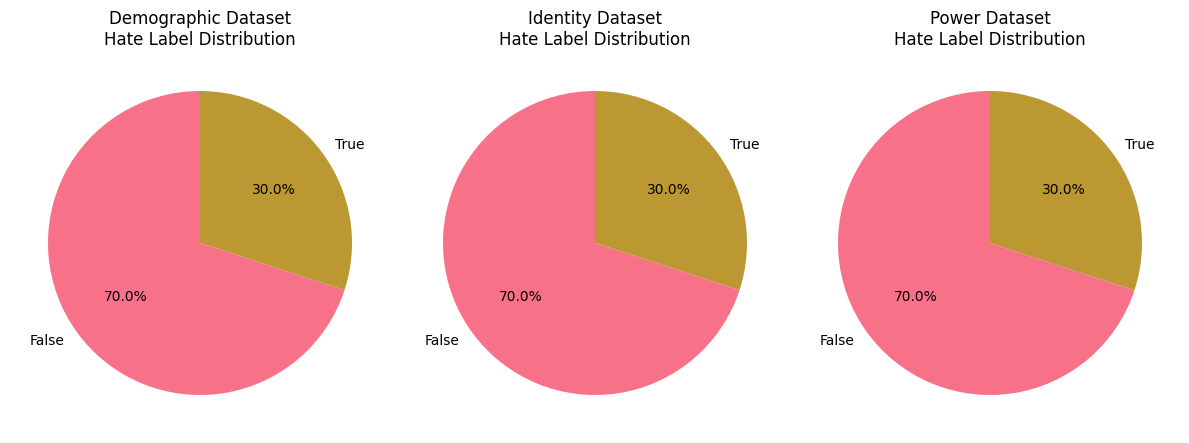

DEMOGRAPHIC DATASET:
Total records: 276872
Hate: 83089 (30.0%)
Non-hate: 193783 (70.0%)

IDENTITY DATASET:
Total records: 159872
Hate: 47968 (30.0%)
Non-hate: 111904 (70.0%)

POWER DATASET:
Total records: 295016
Hate: 88636 (30.0%)
Non-hate: 206380 (70.0%)

COMBINED DATASETS:
Total records: 731760
Total hate: 219693 (30.0%)
Total non-hate: 512067 (70.0%)


In [33]:
# Cell 3: Hate label distribution analysis
print("=== HATE LABEL DISTRIBUTION ===\n")

# Analyze hate label distribution
fig, axes = plt.subplots(1, 3, figsize=(12, 5))

# Demographic dataset
demo_hate_counts = df_demo['hate'].value_counts()
axes[0].pie(demo_hate_counts.values, labels=demo_hate_counts.index, autopct='%1.1f%%', startangle=90)
axes[0].set_title('Demographic Dataset\nHate Label Distribution')

# Identity dataset
identity_hate_counts = df_identity['hate'].value_counts()
axes[1].pie(identity_hate_counts.values, labels=identity_hate_counts.index, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Identity Dataset\nHate Label Distribution')

# Power dataset
power_hate_counts = df_power['hate'].value_counts()
axes[2].pie(power_hate_counts.values, labels=power_hate_counts.index, autopct='%1.1f%%', startangle=90)
axes[2].set_title('Power Dataset\nHate Label Distribution')

plt.tight_layout()
plt.show()

# Print detailed statistics
print("DEMOGRAPHIC DATASET:")
print(f"Total records: {len(df_demo)}")
print(f"Hate: {demo_hate_counts.get(True, 0)} ({demo_hate_counts.get(True, 0)/len(df_demo)*100:.1f}%)")
print(f"Non-hate: {demo_hate_counts.get(False, 0)} ({demo_hate_counts.get(False, 0)/len(df_demo)*100:.1f}%)")

print("\nIDENTITY DATASET:")
print(f"Total records: {len(df_identity)}")
print(f"Hate: {identity_hate_counts.get(True, 0)} ({identity_hate_counts.get(True, 0)/len(df_identity)*100:.1f}%)")
print(f"Non-hate: {identity_hate_counts.get(False, 0)} ({identity_hate_counts.get(False, 0)/len(df_identity)*100:.1f}%)")

print("\nPOWER DATASET:")
print(f"Total records: {len(df_power)}")
print(f"Hate: {power_hate_counts.get(True, 0)} ({power_hate_counts.get(True, 0)/len(df_power)*100:.1f}%)")
print(f"Non-hate: {power_hate_counts.get(False, 0)} ({power_hate_counts.get(False, 0)/len(df_power)*100:.1f}%)")

# Combined statistics
total_records = len(df_demo) + len(df_identity) + len(df_power)
total_hate = demo_hate_counts.get(True, 0) + identity_hate_counts.get(True, 0) + power_hate_counts.get(True, 0)
total_non_hate = demo_hate_counts.get(False, 0) + identity_hate_counts.get(False, 0) + power_hate_counts.get(False, 0)

print(f"\nCOMBINED DATASETS:")
print(f"Total records: {total_records}")
print(f"Total hate: {total_hate} ({total_hate/total_records*100:.1f}%)")
print(f"Total non-hate: {total_non_hate} ({total_non_hate/total_records*100:.1f}%)")

=== GROUPING ANALYSIS ===

DEMOGRAPHIC DATASET - Grouping categories:
grouping
race/ethnicity      118264
gender/sexuality    105088
religion             53520
Name: count, dtype: int64

IDENTITY DATASET - Grouping categories:
grouping
women                                       46584
black people                                29440
muslims and arabic/middle eastern people    22848
lgbtq+ people                               17544
asian people                                13280
latinx people                               11704
jews                                         8480
white people                                 3888
men                                          3064
christians                                   3040
Name: count, dtype: int64

POWER DATASET - Grouping categories:
grouping
marginalized    281696
hegemonic        13320
Name: count, dtype: int64


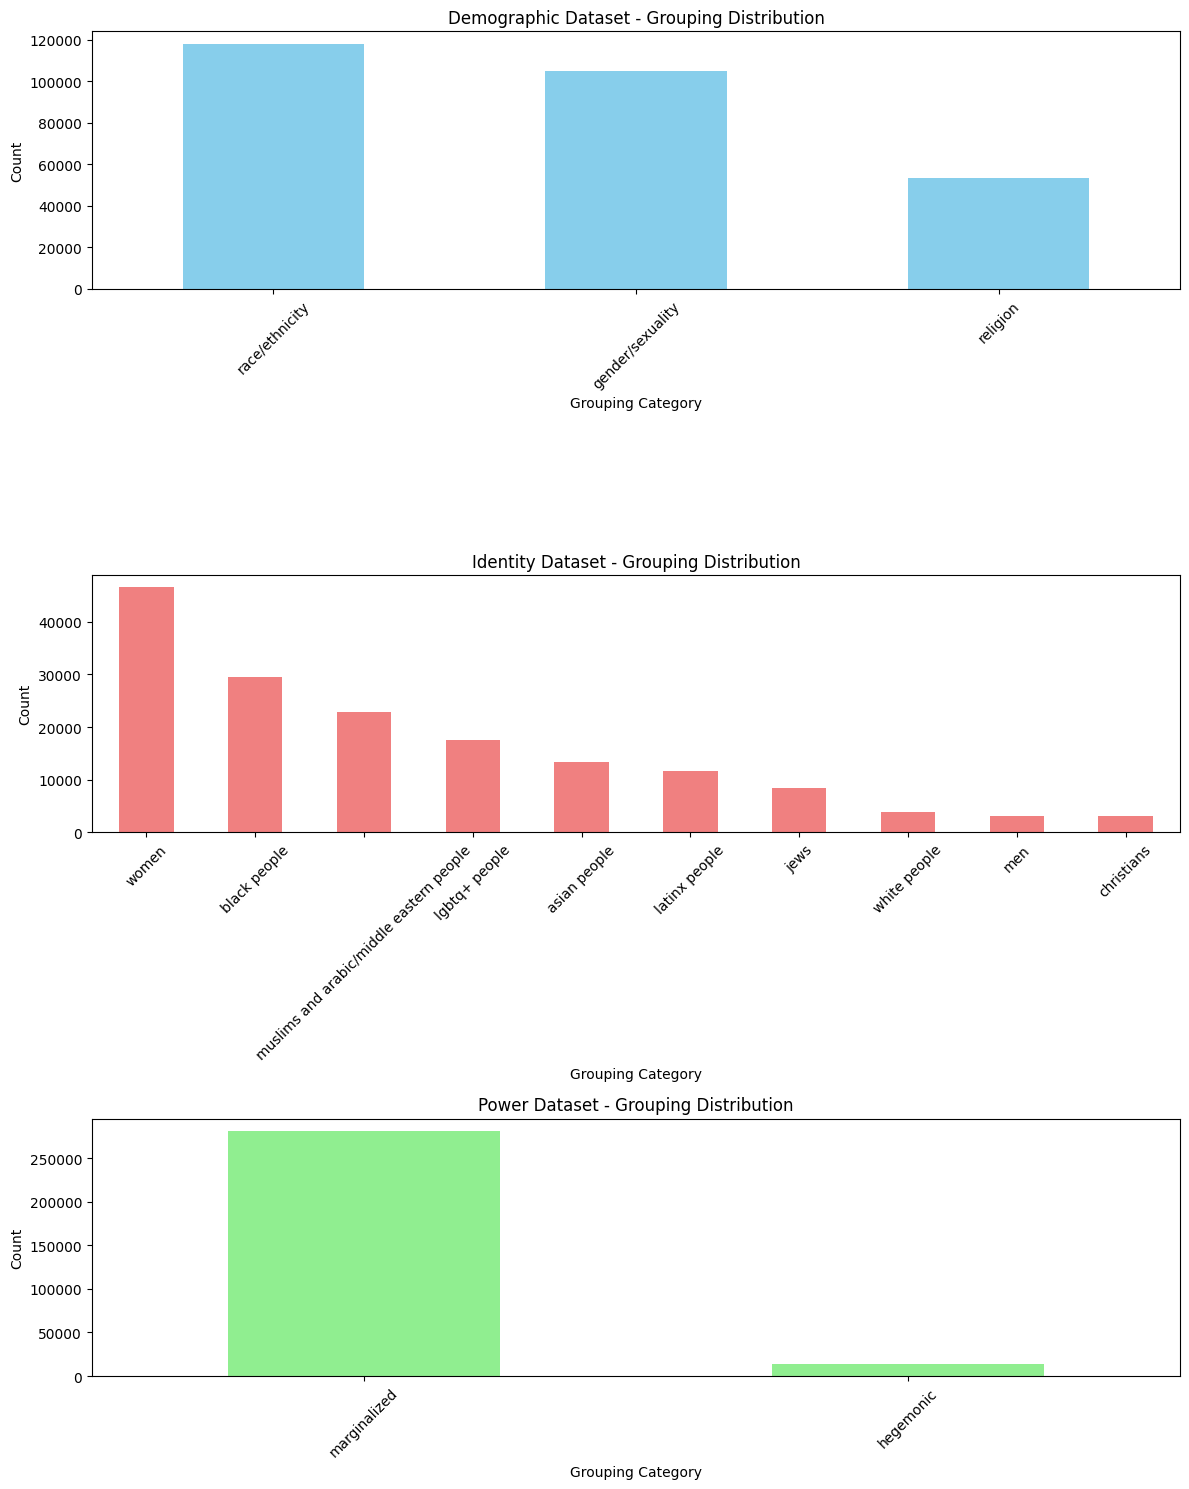


=== DATASET SOURCE ANALYSIS ===

DEMOGRAPHIC DATASET - Dataset sources:
dataset
civilcomments    69218
sbic             69218
kennedy2020      69218
hatexplain       69218
Name: count, dtype: int64

IDENTITY DATASET - Dataset sources:
dataset
hatexplain       39968
kennedy2020      39968
civilcomments    39968
sbic             39968
Name: count, dtype: int64

POWER DATASET - Dataset sources:
dataset
civilcomments    73754
hatexplain       73754
kennedy2020      73754
sbic             73754
Name: count, dtype: int64

COMBINED - All dataset sources:
dataset
civilcomments    182940
sbic             182940
kennedy2020      182940
hatexplain       182940
Name: count, dtype: int64


In [35]:
# Cell 4: Grouping and dataset source analysis
print("=== GROUPING ANALYSIS ===\n")

# Analyze grouping categories
print("DEMOGRAPHIC DATASET - Grouping categories:")
demo_grouping = df_demo['grouping'].value_counts()
print(demo_grouping)

print("\nIDENTITY DATASET - Grouping categories:")
identity_grouping = df_identity['grouping'].value_counts()
print(identity_grouping)

print("\nPOWER DATASET - Grouping categories:")
power_grouping = df_power['grouping'].value_counts()
print(power_grouping)

# Visualize grouping distribution
fig, axes = plt.subplots(3, 1, figsize=(12, 15))

# Demographic dataset groupings
demo_grouping.plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Demographic Dataset - Grouping Distribution')
axes[0].set_xlabel('Grouping Category')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=45)

# Identity dataset groupings
identity_grouping.plot(kind='bar', ax=axes[1], color='lightcoral')
axes[1].set_title('Identity Dataset - Grouping Distribution')
axes[1].set_xlabel('Grouping Category')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=45)

# Power dataset groupings
power_grouping.plot(kind='bar', ax=axes[2], color='lightgreen')
axes[2].set_title('Power Dataset - Grouping Distribution')
axes[2].set_xlabel('Grouping Category') 
axes[2].set_ylabel('Count')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Dataset source analysis
print("\n=== DATASET SOURCE ANALYSIS ===\n")

print("DEMOGRAPHIC DATASET - Dataset sources:")
demo_datasets = df_demo['dataset'].value_counts()
print(demo_datasets)

print("\nIDENTITY DATASET - Dataset sources:")
identity_datasets = df_identity['dataset'].value_counts()
print(identity_datasets)

print("\nPOWER DATASET - Dataset sources:")
power_datasets = df_power['dataset'].value_counts()
print(power_datasets)

# Combined dataset sources
all_datasets = pd.concat([df_demo['dataset'], df_identity['dataset'], df_power['dataset']]).value_counts()
print(f"\nCOMBINED - All dataset sources:")
print(all_datasets)

In [20]:
import ast

def extract_unique_values(df, column_name):
    unique_values = set()
    
    for item in df[column_name].dropna():
        # Skip empty lists
        if item == '[]' or item == []:
            continue
            
        try:
            # Try to parse if it's a string representation
            if isinstance(item, str):
                value_list = ast.literal_eval(item)
            else:
                value_list = item
                
            if value_list:  # Check if list is not empty
                unique_values.update(value_list)
                
        except (ValueError, SyntaxError) as e:
            print(f"Could not process value: {item}\nError: {e}")
    
    return unique_values


demo = extract_unique_values(df_demo, 'target_groups')
identity = extract_unique_values(df_identity, 'target_groups')

print("\nAll unique target values found:")
print("-" * 30)
all_values = sorted(demo.union(identity))
for value in all_values:
    print(value)


All unique target values found:
------------------------------
"urban minorities"
aboriginals
aborted children
abortion
abortions
abuse survivors
abuse victims
afghan folks
afghan people
afghani
african children
african dads
african kids
african migrants
african people
african refugees
african women
all colored races
all dark skinned peoples
all feminists
all gay people
all groups targeted by nazis
all lgtb folks
all middle east
all minorities
all minorities and non whites
all minorities and women
all non white races
all non whites
all non-white folks
all non-whites
all races
all racial minorities
all religions
alt-right
american non-whites
americans
antifa
any black person
any folks with brown skin
any no white
any non-white
anyone not white
anyone that isn't white.
anyone who is gay
arab folks
arabian
arabic/middle eastern people
asexual people
asian people
asian women
assassination victim
assassination victims
assault victims
atheists
austistic
basically all non-white women
biracia

In [26]:
identity

{'aboriginals',
 'aborted children',
 'abortion',
 'abortions',
 'abuse survivors',
 'abuse victims',
 'afghan folks',
 'afghan people',
 'afghani',
 'african children',
 'african dads',
 'african kids',
 'african migrants',
 'african people',
 'african refugees',
 'african women',
 'all colored races',
 'all dark skinned peoples',
 'all feminists',
 'all gay people',
 'all groups targeted by nazis',
 'all lgtb folks',
 'all middle east',
 'all minorities',
 'all minorities and non whites',
 'all minorities and women',
 'all non white races',
 'all non whites',
 'all non-white folks',
 'all non-whites',
 'all races',
 'all racial minorities',
 'all religions',
 'american non-whites',
 'americans',
 'antifa',
 'any folks with brown skin',
 'any no white',
 'any non-white',
 'anyone not white',
 "anyone that isn't white.",
 'anyone who is gay',
 'arab folks',
 'arabian',
 'arabic/middle eastern people',
 'asexual people',
 'asian people',
 'asian women',
 'assassination victim',
 'assass

=== TARGET GROUPS ANALYSIS 2 ===

DEMOGRAPHIC DATASET:
Total target group mentions: 566227
Unique target groups: 485
Records with target groups: 171826
Records without target groups: 105046

IDENTITY DATASET:
Total target group mentions: 326339
Unique target groups: 425
Records with target groups: 99306
Records without target groups: 60566

=== MOST COMMON TARGET GROUPS ===

DEMOGRAPHIC DATASET - Top 10 target groups:
women: 63710
black people: 44763
men: 39088
muslims: 36321
white people: 29498
arabic/middle eastern people: 28856
asian people: 25425
jews: 24616
gay people: 21608
latinx people: 18986

IDENTITY DATASET - Top 10 target groups:
women: 40270
black people: 28667
men: 20575
muslims: 18157
asian people: 17328
white people: 15893
arabic/middle eastern people: 15038
latinx people: 13493
gay people: 12199
jews: 11066

COMBINED - Top 15 target groups:
women: 103980
black people: 73430
men: 59663
muslims: 54478
white people: 45391
arabic/middle eastern people: 43894
asian people: 

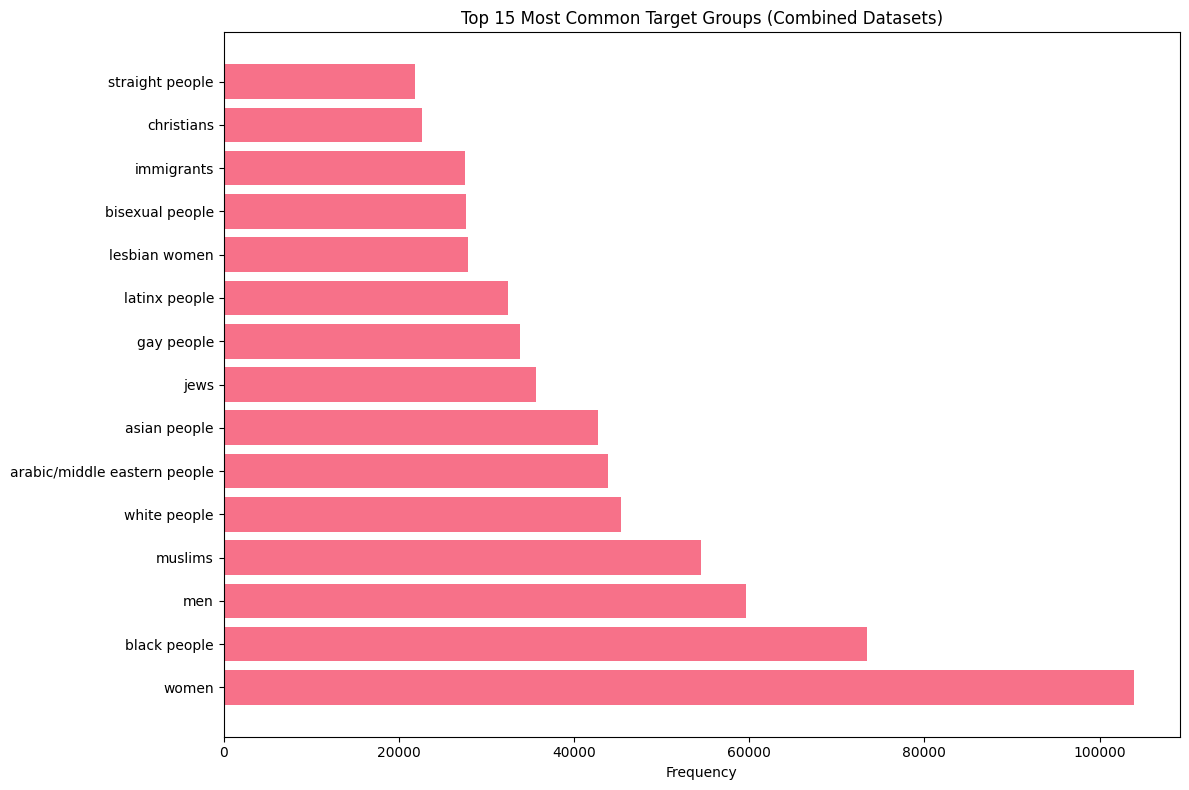

In [14]:
# Cell 5: Target groups analysis
print("=== TARGET GROUPS ANALYSIS 2 ===\n")

# Function to extract all target groups
def extract_target_groups(df):
    all_groups = []
    for groups_list in df['target_groups']:
        all_groups.extend(groups_list)
    return all_groups

# Extract target groups from both datasets
demo_target_groups = extract_target_groups(df_demo)
identity_target_groups = extract_target_groups(df_identity)

print("DEMOGRAPHIC DATASET:")
print(f"Total target group mentions: {len(demo_target_groups)}")
print(f"Unique target groups: {len(set(demo_target_groups))}")
print(f"Records with target groups: {sum(1 for groups in df_demo['target_groups'] if groups)}")
print(f"Records without target groups: {sum(1 for groups in df_demo['target_groups'] if not groups)}")

print("\nIDENTITY DATASET:")
print(f"Total target group mentions: {len(identity_target_groups)}")
print(f"Unique target groups: {len(set(identity_target_groups))}")
print(f"Records with target groups: {sum(1 for groups in df_identity['target_groups'] if groups)}")
print(f"Records without target groups: {sum(1 for groups in df_identity['target_groups'] if not groups)}")

# Most common target groups
print("\n=== MOST COMMON TARGET GROUPS ===")

demo_group_counts = Counter(demo_target_groups)
identity_group_counts = Counter(identity_target_groups)

print("\nDEMOGRAPHIC DATASET - Top 10 target groups:")
for group, count in demo_group_counts.most_common(10):
    print(f"{group}: {count}")

print("\nIDENTITY DATASET - Top 10 target groups:")
for group, count in identity_group_counts.most_common(10):
    print(f"{group}: {count}")

# Combined analysis
all_target_groups = demo_target_groups + identity_target_groups
all_group_counts = Counter(all_target_groups)

print(f"\nCOMBINED - Top 15 target groups:")
for group, count in all_group_counts.most_common(15):
    print(f"{group}: {count}")

# Visualize top target groups
plt.figure(figsize=(12, 8))
top_groups = dict(all_group_counts.most_common(15))
plt.barh(list(top_groups.keys()), list(top_groups.values()))
plt.title('Top 15 Most Common Target Groups (Combined Datasets)')
plt.xlabel('Frequency')
plt.tight_layout()
plt.show()

=== TEXT LENGTH ANALYSIS ===

DEMOGRAPHIC DATASET - Text length statistics:
count    276872.000000
mean        183.197308
std         186.347154
min           1.000000
25%          73.000000
50%         123.000000
75%         220.000000
max        1215.000000
Name: text_length, dtype: float64

IDENTITY DATASET - Text length statistics:
count    159872.000000
mean        183.126933
std         187.067941
min           1.000000
25%          72.000000
50%         123.000000
75%         219.000000
max        1215.000000
Name: text_length, dtype: float64


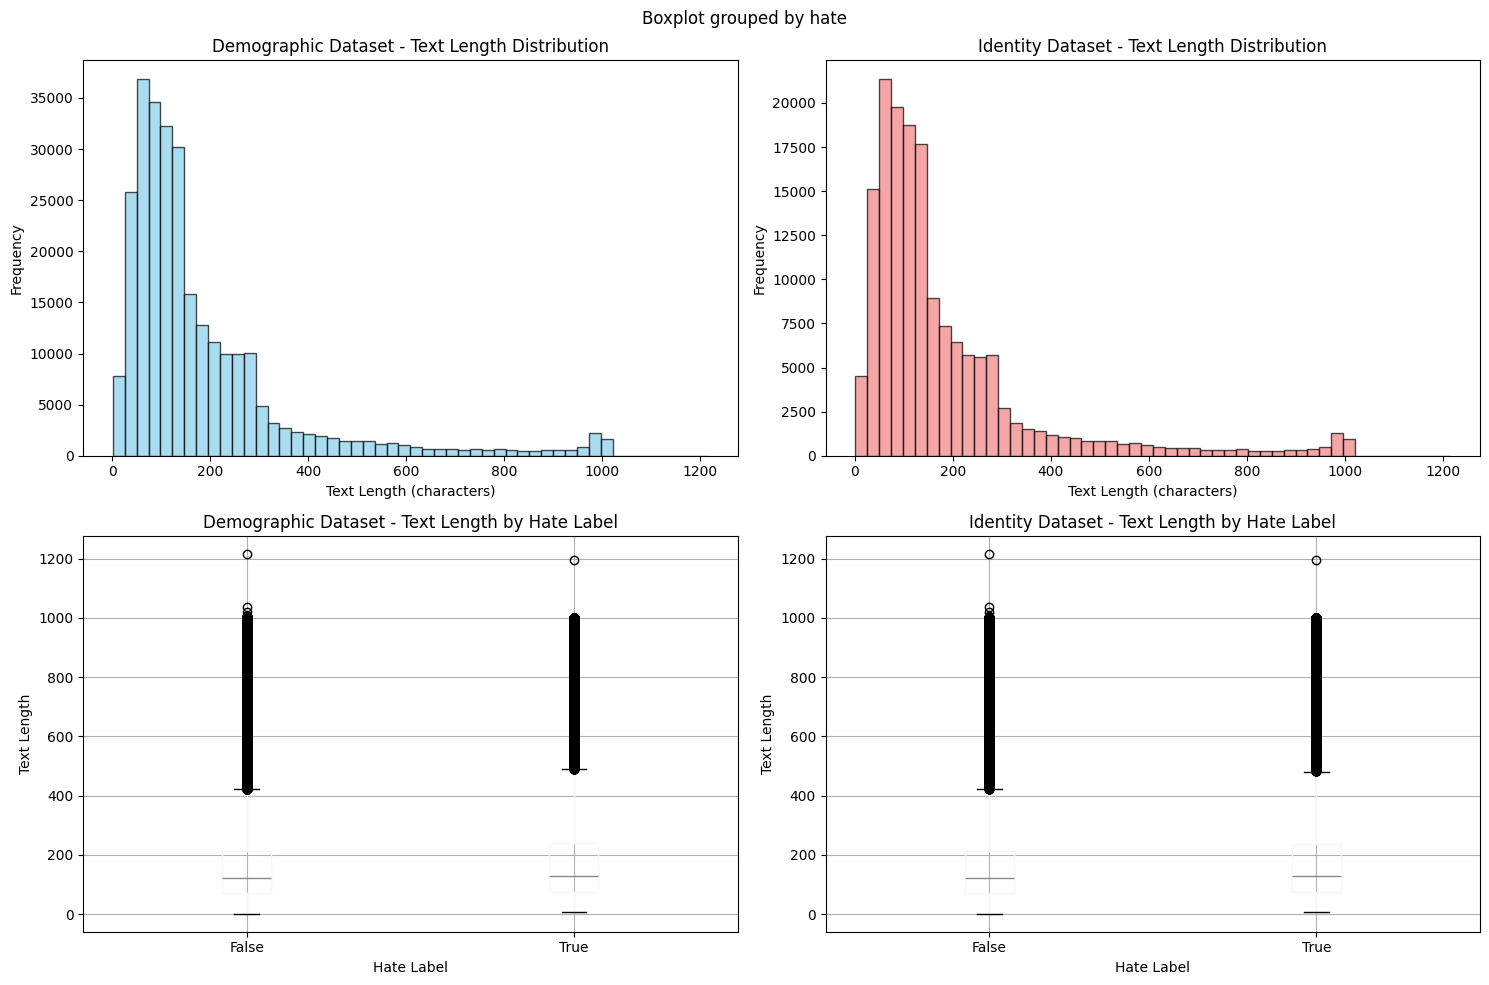


=== FOLD DISTRIBUTION ANALYSIS ===

DEMOGRAPHIC DATASET - Fold distribution:
fold
train    166136
test     110736
Name: count, dtype: int64

IDENTITY DATASET - Fold distribution:
fold
train    95920
test     63952
Name: count, dtype: int64


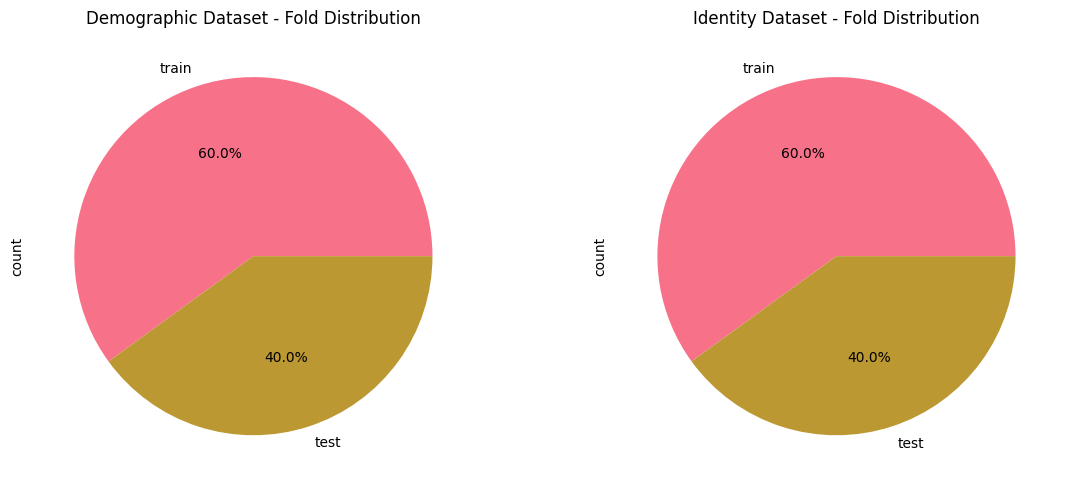

In [15]:
# Cell 6: Text length and fold distribution analysis
print("=== TEXT LENGTH ANALYSIS ===\n")

# Calculate text lengths
df_demo['text_length'] = df_demo['text'].str.len()
df_identity['text_length'] = df_identity['text'].str.len()

# Text length statistics
print("DEMOGRAPHIC DATASET - Text length statistics:")
print(df_demo['text_length'].describe())

print("\nIDENTITY DATASET - Text length statistics:")
print(df_identity['text_length'].describe())

# Visualize text length distributions
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Text length histograms
axes[0,0].hist(df_demo['text_length'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
axes[0,0].set_title('Demographic Dataset - Text Length Distribution')
axes[0,0].set_xlabel('Text Length (characters)')
axes[0,0].set_ylabel('Frequency')

axes[0,1].hist(df_identity['text_length'], bins=50, alpha=0.7, color='lightcoral', edgecolor='black')
axes[0,1].set_title('Identity Dataset - Text Length Distribution')
axes[0,1].set_xlabel('Text Length (characters)')
axes[0,1].set_ylabel('Frequency')

# Text length by hate label
df_demo.boxplot(column='text_length', by='hate', ax=axes[1,0])
axes[1,0].set_title('Demographic Dataset - Text Length by Hate Label')
axes[1,0].set_xlabel('Hate Label')
axes[1,0].set_ylabel('Text Length')

df_identity.boxplot(column='text_length', by='hate', ax=axes[1,1])
axes[1,1].set_title('Identity Dataset - Text Length by Hate Label')
axes[1,1].set_xlabel('Hate Label')
axes[1,1].set_ylabel('Text Length')

plt.tight_layout()
plt.show()

# Fold distribution analysis
print("\n=== FOLD DISTRIBUTION ANALYSIS ===\n")

print("DEMOGRAPHIC DATASET - Fold distribution:")
demo_fold = df_demo['fold'].value_counts()
print(demo_fold)

print("\nIDENTITY DATASET - Fold distribution:")
identity_fold = df_identity['fold'].value_counts()
print(identity_fold)

# Visualize fold distribution
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

demo_fold.plot(kind='pie', ax=axes[0], autopct='%1.1f%%')
axes[0].set_title('Demographic Dataset - Fold Distribution')

identity_fold.plot(kind='pie', ax=axes[1], autopct='%1.1f%%')
axes[1].set_title('Identity Dataset - Fold Distribution')

plt.tight_layout()
plt.show()

=== CROSS-TABULATION ANALYSIS ===

DEMOGRAPHIC DATASET - Hate vs Grouping:
hate               False   True     All
grouping                               
gender/sexuality   73536  31552  105088
race/ethnicity     82830  35434  118264
religion           37417  16103   53520
All               193783  83089  276872

IDENTITY DATASET - Hate vs Grouping:
hate                                       False   True     All
grouping                                                       
asian people                                9278   4002   13280
black people                               20599   8841   29440
christians                                  2139    901    3040
jews                                        5905   2575    8480
latinx people                               8185   3519   11704
lgbtq+ people                              12297   5247   17544
men                                         2144    920    3064
muslims and arabic/middle eastern people   15990   6858   22848
white p

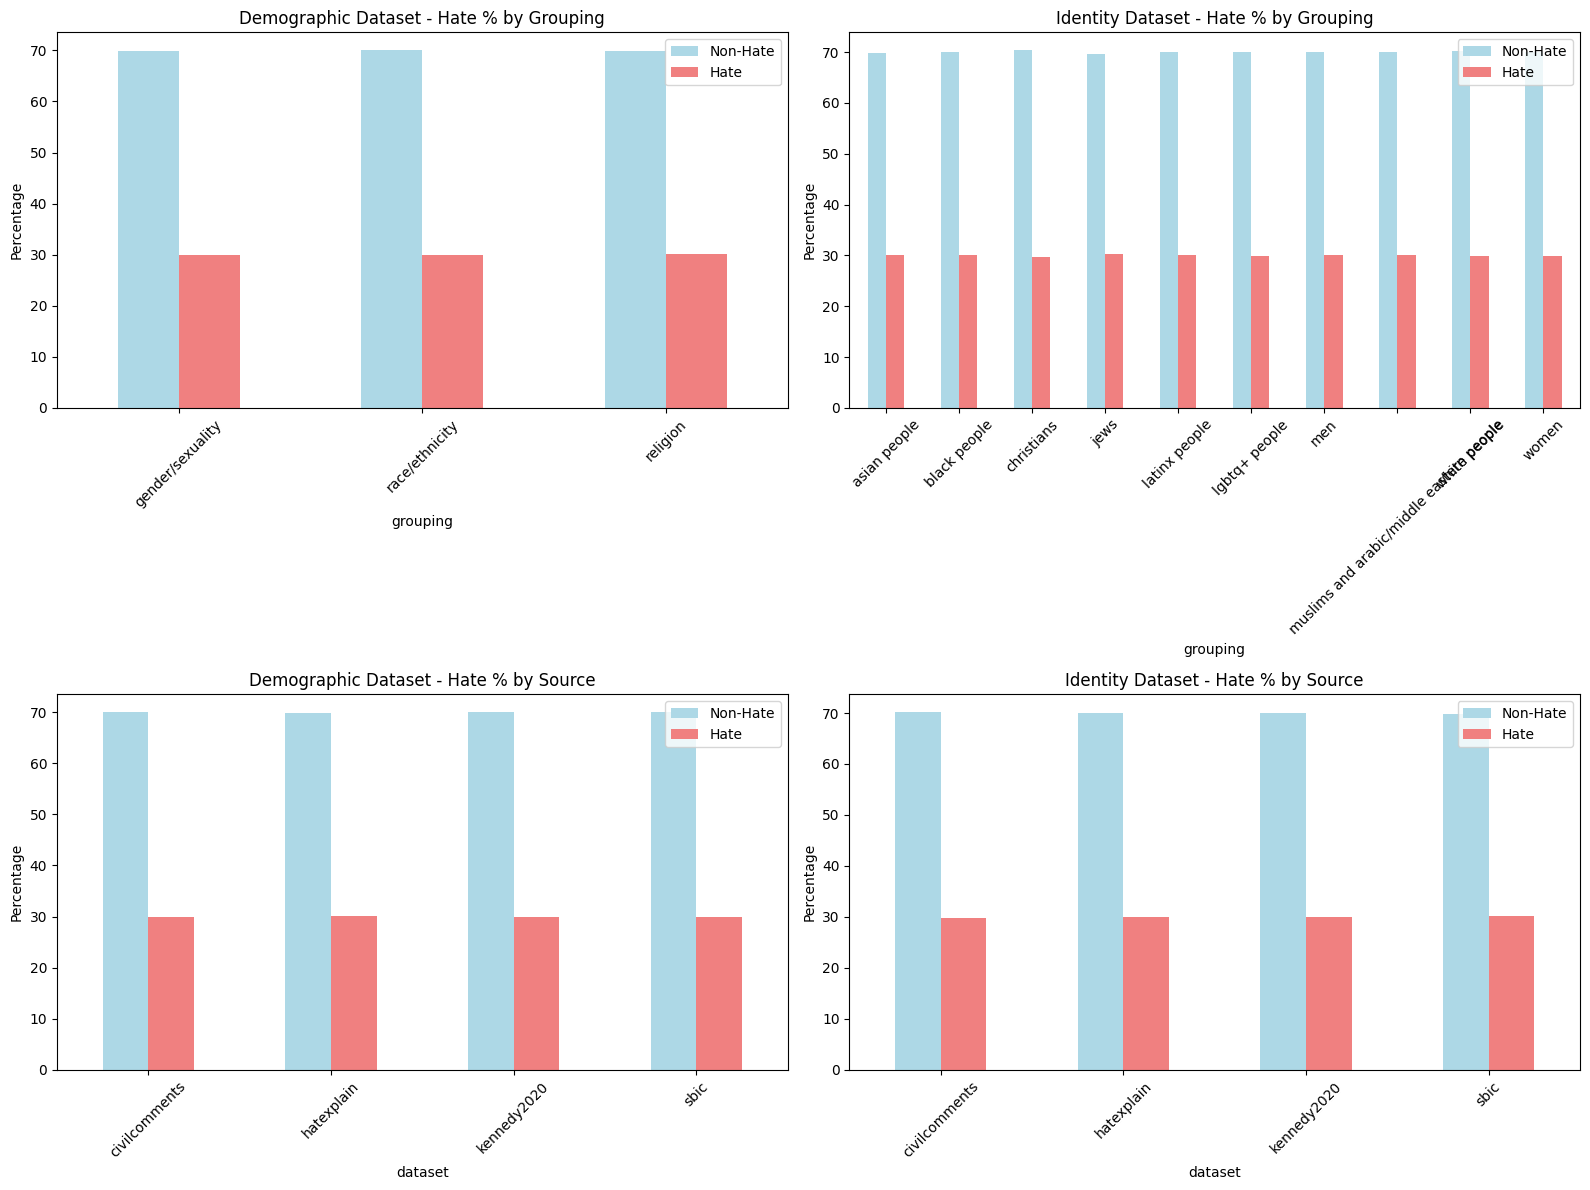

In [11]:
# Cell 7: Cross-tabulation analysis
print("=== CROSS-TABULATION ANALYSIS ===\n")

# Hate vs Grouping cross-tabulation
print("DEMOGRAPHIC DATASET - Hate vs Grouping:")
demo_crosstab = pd.crosstab(df_demo['grouping'], df_demo['hate'], margins=True)
print(demo_crosstab)

print("\nIDENTITY DATASET - Hate vs Grouping:")
identity_crosstab = pd.crosstab(df_identity['grouping'], df_identity['hate'], margins=True)
print(identity_crosstab)

# Hate vs Dataset source cross-tabulation
print("\n=== HATE VS DATASET SOURCE ===\n")

print("DEMOGRAPHIC DATASET - Hate vs Dataset source:")
demo_dataset_crosstab = pd.crosstab(df_demo['dataset'], df_demo['hate'], margins=True)
print(demo_dataset_crosstab)

print("\nIDENTITY DATASET - Hate vs Dataset source:")
identity_dataset_crosstab = pd.crosstab(df_identity['dataset'], df_identity['hate'], margins=True)
print(identity_dataset_crosstab)

# Visualize cross-tabulations
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Demographic dataset - Grouping vs Hate
demo_crosstab_pct = pd.crosstab(df_demo['grouping'], df_demo['hate'], normalize='index') * 100
demo_crosstab_pct.plot(kind='bar', ax=axes[0,0], color=['lightblue', 'lightcoral'])
axes[0,0].set_title('Demographic Dataset - Hate % by Grouping')
axes[0,0].set_ylabel('Percentage')
axes[0,0].legend(['Non-Hate', 'Hate'])
axes[0,0].tick_params(axis='x', rotation=45)

# Identity dataset - Grouping vs Hate
identity_crosstab_pct = pd.crosstab(df_identity['grouping'], df_identity['hate'], normalize='index') * 100
identity_crosstab_pct.plot(kind='bar', ax=axes[0,1], color=['lightblue', 'lightcoral'])
axes[0,1].set_title('Identity Dataset - Hate % by Grouping')
axes[0,1].set_ylabel('Percentage')
axes[0,1].legend(['Non-Hate', 'Hate'])
axes[0,1].tick_params(axis='x', rotation=45)

# Dataset source analysis
demo_dataset_pct = pd.crosstab(df_demo['dataset'], df_demo['hate'], normalize='index') * 100
demo_dataset_pct.plot(kind='bar', ax=axes[1,0], color=['lightblue', 'lightcoral'])
axes[1,0].set_title('Demographic Dataset - Hate % by Source')
axes[1,0].set_ylabel('Percentage')
axes[1,0].legend(['Non-Hate', 'Hate'])
axes[1,0].tick_params(axis='x', rotation=45)

identity_dataset_pct = pd.crosstab(df_identity['dataset'], df_identity['hate'], normalize='index') * 100
identity_dataset_pct.plot(kind='bar', ax=axes[1,1], color=['lightblue', 'lightcoral'])
axes[1,1].set_title('Identity Dataset - Hate % by Source')
axes[1,1].set_ylabel('Percentage')
axes[1,1].legend(['Non-Hate', 'Hate'])
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [12]:
# Cell 8: Summary report
print("="*60)
print("                    DATASET PROFILING SUMMARY")
print("="*60)

def print_section(title):
    print(f"\n{'='*len(title)}")
    print(title)
    print('='*len(title))

print_section("OVERALL STATISTICS")
total_records = len(df_demo) + len(df_identity)
total_hate = sum(df_demo['hate']) + sum(df_identity['hate'])
total_non_hate = total_records - total_hate

print(f"Total Records: {total_records:,}")
print(f"Hate Records: {total_hate:,} ({total_hate/total_records*100:.1f}%)")
print(f"Non-Hate Records: {total_non_hate:,} ({total_non_hate/total_records*100:.1f}%)")

print_section("DATASET BREAKDOWN")
print(f"Demographic Dataset: {len(df_demo):,} records")
print(f"  - Hate: {sum(df_demo['hate']):,} ({sum(df_demo['hate'])/len(df_demo)*100:.1f}%)")
print(f"  - Non-Hate: {len(df_demo)-sum(df_demo['hate']):,} ({(len(df_demo)-sum(df_demo['hate']))/len(df_demo)*100:.1f}%)")

print(f"\nIdentity Dataset: {len(df_identity):,} records")
print(f"  - Hate: {sum(df_identity['hate']):,} ({sum(df_identity['hate'])/len(df_identity)*100:.1f}%)")
print(f"  - Non-Hate: {len(df_identity)-sum(df_identity['hate']):,} ({(len(df_identity)-sum(df_identity['hate']))/len(df_identity)*100:.1f}%)")

print_section("GROUPING CATEGORIES")
all_groupings = pd.concat([df_demo['grouping'], df_identity['grouping']]).value_counts()
print(f"Total unique groupings: {len(all_groupings)}")
for grouping, count in all_groupings.head(10).items():
    print(f"  {grouping}: {count:,} records")

print_section("DATA SOURCES")
all_sources = pd.concat([df_demo['dataset'], df_identity['dataset']]).value_counts()
print(f"Total unique data sources: {len(all_sources)}")
for source, count in all_sources.items():
    print(f"  {source}: {count:,} records")

print_section("TARGET GROUPS")
demo_target_groups = extract_target_groups(df_demo)
identity_target_groups = extract_target_groups(df_identity)
all_target_groups = demo_target_groups + identity_target_groups
unique_targets = len(set(all_target_groups))

print(f"Total target group mentions: {len(all_target_groups):,}")
print(f"Unique target groups: {unique_targets}")
print(f"Records with target groups: {sum(1 for df in [df_demo, df_identity] for groups in df['target_groups'] if groups):,}")

print_section("TEXT CHARACTERISTICS")
all_text_lengths = list(df_demo['text_length']) + list(df_identity['text_length'])
print(f"Average text length: {np.mean(all_text_lengths):.1f} characters")
print(f"Median text length: {np.median(all_text_lengths):.1f} characters")
print(f"Shortest text: {min(all_text_lengths)} characters")
print(f"Longest text: {max(all_text_lengths)} characters")

print_section("DATA QUALITY")
demo_missing = df_demo.isnull().sum().sum()
identity_missing = df_identity.isnull().sum().sum()
print(f"Missing values in demographic dataset: {demo_missing}")
print(f"Missing values in identity dataset: {identity_missing}")
print(f"Total missing values: {demo_missing + identity_missing}")

print(f"\n{'='*60}")
print("                    PROFILING COMPLETE")
print("="*60)

                    DATASET PROFILING SUMMARY

OVERALL STATISTICS
Total Records: 436,744
Hate Records: 131,057 (30.0%)
Non-Hate Records: 305,687 (70.0%)

DATASET BREAKDOWN
Demographic Dataset: 276,872 records
  - Hate: 83,089 (30.0%)
  - Non-Hate: 193,783 (70.0%)

Identity Dataset: 159,872 records
  - Hate: 47,968 (30.0%)
  - Non-Hate: 111,904 (70.0%)

GROUPING CATEGORIES
Total unique groupings: 13
  race/ethnicity: 118,264 records
  gender/sexuality: 105,088 records
  religion: 53,520 records
  women: 46,584 records
  black people: 29,440 records
  muslims and arabic/middle eastern people: 22,848 records
  lgbtq+ people: 17,544 records
  asian people: 13,280 records
  latinx people: 11,704 records
  jews: 8,480 records

DATA SOURCES
Total unique data sources: 4
  civilcomments: 109,186 records
  sbic: 109,186 records
  kennedy2020: 109,186 records
  hatexplain: 109,186 records

TARGET GROUPS
Total target group mentions: 892,566
Unique target groups: 485
Records with target groups: 271